# <center><font color="red">Customer Retention Enhancement through Predictive Analytics</center>

### Customer retention strategies at Lloyds Banking Group through advanced data science and analytics

# PROBLEM STATEMENT
Fictional client, SmartBank aims to reduce customer churn by predicting which customers are likely to leave. To build an accurate predictive model, we need to gather relevant customer data, explore behavioural patterns through EDA, and prepare a clean, structured dataset that reveals key drivers behind churn.

## DOMAIN ANALYSIS AND ATTRIBUTES
- **CustomerID**: Unique identifier for each customer.
- **Age**: Customer’s age.
- **Gender**: Customer’s gender.
- **MaritalStatus**: Customer’s marital status (e.g., single, married).
- **IncomeLevel**: Customer’s income bracket (e.g., low, medium, high).
- **TransactionID**: Unique identifier for each transaction made by the customer.
- **TransactionDate**: Date when a transaction occurred.
- **AmountSpent**: Amount of money spent in a transaction or period.
- **ProductCategory**: Category of product purchased.
- **InteractionID**: Unique identifier for customer service interactions.
- **InteractionDate**: Date of customer interaction with support or service.
- **InteractionType**: Type of interaction (e.g., complaint, inquiry).
- **ResolutionStatus**: Outcome of the interaction (e.g., resolved, unresolved).
- **LastLoginDate**: Date of last login or service use.
- **LoginFrequency**: How often the customer logs in or uses the service.
- **ServiceUsage**: Digital channels through which customers interact with and access their banking services.
- **ChurnStatus**: Target variable indicating whether the customer has churned (left the service) or not.

## 1. IMPORTING LIBRARIES

In [6]:
# Importing pandas library for working with data sets
import pandas as pd

# Importing numpy library for working with arrays
import numpy as np

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn library for advanced visualization
import seaborn as sns

# Importing warnings for disable warnings from the code
import warnings
# To ignore the warnings
warnings.filterwarnings('ignore')

# YData Profiling for generating an automatic exploratory data analysis (EDA) report
from ydata_profiling import ProfileReport

# convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder 

# MinMaxScaler for feature scaling to bring values within a specific range
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split for splitting data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

# Importing an ensemble model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing an advanced boosting model GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier 

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV

# Importing Multi-layer Perceptron (MLP) Classifier
from sklearn.neural_network import MLPClassifier

# Importing performance metrics for model evaluation
# accuracy_score,confusion_matrix,classification_report,etc.
from sklearn.metrics import *

## 2. LOADING THE DATA

In [8]:
# Load the Excel file
excel_file = pd.ExcelFile('Customer_Churn_Data_Large.xlsx')

# Loop through all sheets and save as UTF-8 CSV
for sheet in excel_file.sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet)
    df.to_csv(f"{sheet}.csv", index=False, encoding='utf-8')

In [9]:
# Load the saved CSV files
demo_df = pd.read_csv('Customer_Demographics.csv', encoding='utf-8')
txn_df = pd.read_csv('Transaction_History.csv', encoding='utf-8')
service_df = pd.read_csv('Customer_Service.csv', encoding='utf-8')
Online_df = pd.read_csv('Online_Activity.csv', encoding='utf-8')
Churn_df = pd.read_csv('Churn_Status.csv', encoding='utf-8')

In [10]:
# Merge datasets on 'CustomerID'
merged_df = pd.merge(demo_df, txn_df, on='CustomerID')
merged_df = pd.merge(merged_df, service_df, on='CustomerID')
merged_df = pd.merge(merged_df, Online_df, on='CustomerID')
merged_df = pd.merge(merged_df, Churn_df, on='CustomerID')
merged_df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,995,23,F,Divorced,Low,1236,2022-03-19,225.82,Furniture,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5200,995,23,F,Divorced,Low,6933,2022-08-30,494.90,Groceries,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5201,995,23,F,Divorced,Low,4405,2022-10-23,101.21,Clothing,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5202,995,23,F,Divorced,Low,8667,2022-10-18,73.91,Clothing,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1


## 3. BASIC CHECKS

In [12]:
# Visualizing the first 10 rows of the data
merged_df.head(10)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
5,2,65,M,Married,Low,8903,2022-01-09,285.21,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
6,2,65,M,Married,Low,3527,2022-09-16,311.34,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
7,2,65,M,Married,Low,9279,2022-11-19,199.73,Groceries,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
8,3,18,M,Single,Low,9839,2022-10-08,241.06,Books,9976,2022-08-24,Inquiry,Resolved,2023-11-15,3,Website,0
9,3,18,M,Single,Low,7364,2022-08-15,51.07,Clothing,9976,2022-08-24,Inquiry,Resolved,2023-11-15,3,Website,0


In [13]:
# Visualizing the last 10 rows of the data
merged_df.tail(10)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
5194,994,35,F,Single,Medium,9781,2022-03-06,125.20,Electronics,8508,2022-05-14,Complaint,Unresolved,2023-07-23,25,Mobile App,0
5195,994,35,F,Single,Medium,9661,2022-05-16,143.23,Electronics,3087,2022-07-02,Complaint,Unresolved,2023-07-23,25,Mobile App,0
5196,994,35,F,Single,Medium,9661,2022-05-16,143.23,Electronics,8508,2022-05-14,Complaint,Unresolved,2023-07-23,25,Mobile App,0
5197,994,35,F,Single,Medium,5781,2022-01-14,236.58,Clothing,3087,2022-07-02,Complaint,Unresolved,2023-07-23,25,Mobile App,0
5198,994,35,F,Single,Medium,5781,2022-01-14,236.58,Clothing,8508,2022-05-14,Complaint,Unresolved,2023-07-23,25,Mobile App,0
5199,995,23,F,Divorced,Low,1236,2022-03-19,225.82,Furniture,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5200,995,23,F,Divorced,Low,6933,2022-08-30,494.90,Groceries,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5201,995,23,F,Divorced,Low,4405,2022-10-23,101.21,Clothing,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5202,995,23,F,Divorced,Low,8667,2022-10-18,73.91,Clothing,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1
5203,995,23,F,Divorced,Low,7583,2022-12-27,124.16,Electronics,9101,2022-05-02,Inquiry,Resolved,2023-07-31,34,Website,1


In [14]:
# Checking the column names of the data
merged_df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory',
       'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage',
       'ChurnStatus'],
      dtype='object')

In [15]:
# Checking the index of the data
merged_df.index

RangeIndex(start=0, stop=5204, step=1)

In [16]:
# Checking the number of rows and columns of the data
merged_df.shape  

(5204, 17)

In [17]:
# Checking the basic information of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5204 non-null   int64  
 1   Age               5204 non-null   int64  
 2   Gender            5204 non-null   object 
 3   MaritalStatus     5204 non-null   object 
 4   IncomeLevel       5204 non-null   object 
 5   TransactionID     5204 non-null   int64  
 6   TransactionDate   5204 non-null   object 
 7   AmountSpent       5204 non-null   float64
 8   ProductCategory   5204 non-null   object 
 9   InteractionID     5204 non-null   int64  
 10  InteractionDate   5204 non-null   object 
 11  InteractionType   5204 non-null   object 
 12  ResolutionStatus  5204 non-null   object 
 13  LastLoginDate     5204 non-null   object 
 14  LoginFrequency    5204 non-null   int64  
 15  ServiceUsage      5204 non-null   object 
 16  ChurnStatus       5204 non-null   int64  


In [18]:
# Checking the statistical information of the numerical column in the data
merged_df.describe()

,CustomerID,Age,TransactionID,AmountSpent,InteractionID,LoginFrequency,ChurnStatus
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000
mean,496.470407,43.140085,5495.988470,254.354940,5921.861261,25.918332,0.205995
std,286.681289,15.430343,2595.575295,143.329654,2332.331260,14.110627,0.404466
min,1.000000,18.000000,1000.000000,5.180000,2015.000000,1.000000,0.000000
25%,244.000000,29.000000,3218.000000,128.940000,3873.250000,14.000000,0.000000
50%,504.000000,43.000000,5490.000000,255.175000,5903.000000,27.000000,0.000000
75%,743.000000,57.000000,7713.000000,378.605000,7851.000000,38.000000,0.000000
max,995.000000,69.000000,9997.000000,499.700000,9997.000000,49.000000,1.000000


In [19]:
# Checking the statistical information of the categorical column in the data
merged_df.describe(include="O")

,Gender,MaritalStatus,IncomeLevel,TransactionDate,ProductCategory,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage
count,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204
unique,2,4,3,365,5,344,3,2,299,3
top,F,Divorced,Medium,2022-03-28,Electronics,2022-03-20,Feedback,Resolved,2023-09-25,Online Banking
freq,2857,1425,1800,30,1074,59,1921,2693,64,1914


## 4. REMOVE UNREQUIRED COLUMNS

In [21]:
columns_to_drop = ['CustomerID','TransactionID','TransactionDate','InteractionID',
                   'InteractionDate','LastLoginDate']
merged_df.drop(columns_to_drop,axis=1,inplace=True)
merged_df.head()

,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage,ChurnStatus
0,62,M,Single,Low,416.50,Electronics,Inquiry,Resolved,34,Mobile App,0
1,65,M,Married,Low,54.96,Clothing,Inquiry,Resolved,5,Website,1
2,65,M,Married,Low,197.50,Electronics,Inquiry,Resolved,5,Website,1
3,65,M,Married,Low,101.31,Furniture,Inquiry,Resolved,5,Website,1
4,65,M,Married,Low,397.37,Clothing,Inquiry,Resolved,5,Website,1


In [22]:
# CHECKING DUPLICATE VALUES
print(merged_df.duplicated().sum())

# REMOVING DUPLICATE VALUES
print(merged_df.drop_duplicates(inplace=True))

# VERIFICATION
merged_df.duplicated().sum()

284
None


0

In [23]:
# Checking the unique values for all the columns in the data
for i in merged_df.columns:
    print(f"                                {i.title()}                        ")
    print("\n")
    print(f"* The number of unique values in {i} column :",merged_df[i].nunique())
    print(">>",merged_df[i].unique())
    print('==============================================================================')
    print("\n")

                                Age                        


* The number of unique values in Age column : 52
>> [62 65 18 21 57 37 39 54 41 24 42 30 19 56 35 55 43 31 26 27 38 69 34 23
 33 36 53 67 32 50 46 52 22 59 60 64 29 58 66 49 48 47 28 68 61 20 45 63
 40 51 44 25]


                                Gender                        


* The number of unique values in Gender column : 2
>> ['M' 'F']


                                Maritalstatus                        


* The number of unique values in MaritalStatus column : 4
>> ['Single' 'Married' 'Widowed' 'Divorced']


                                Incomelevel                        


* The number of unique values in IncomeLevel column : 3
>> ['Low' 'Medium' 'High']


                                Amountspent                        


* The number of unique values in AmountSpent column : 3313
>> [416.5   54.96 197.5  ... 494.9  101.21 124.16]


                                Productcategory                        


* The

In [24]:
# Checking the value_counts 
for i in merged_df.columns:
    print(merged_df[i].value_counts())
    print('============================')
    print("\n")

Age
21    201
45    139
37    133
23    132
48    130
52    125
42    123
60    122
53    119
31    116
54    113
64    113
19    111
55    111
20    110
59    110
61    105
25    104
69    103
66    102
30    102
26    101
68    100
58    100
41     99
34     97
38     95
63     94
65     93
56     92
28     91
51     87
18     86
24     85
36     85
27     81
47     80
33     79
35     78
44     76
22     72
50     71
57     70
67     68
29     68
43     67
62     65
32     57
40     51
39     49
46     49
49     10
Name: count, dtype: int64


Gender
F    2698
M    2222
Name: count, dtype: int64


MaritalStatus
Divorced    1336
Widowed     1315
Married     1136
Single      1133
Name: count, dtype: int64


IncomeLevel
Medium    1714
Low       1619
High      1587
Name: count, dtype: int64


AmountSpent
329.23    4
483.91    4
179.18    4
156.21    4
161.63    4
         ..
225.45    1
27.74     1
143.56    1
305.04    1
124.16    1
Name: count, Length: 3313, dtype: int64


ProductCateg

## 5. EXPLORATORY DATA ANALYSIS (EDA)

### 5.1. PROFILE REPORT

In [27]:
report = ProfileReport(merged_df, title="EDA",explorative=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 5.2. UNIVARIATE ANALYSIS 

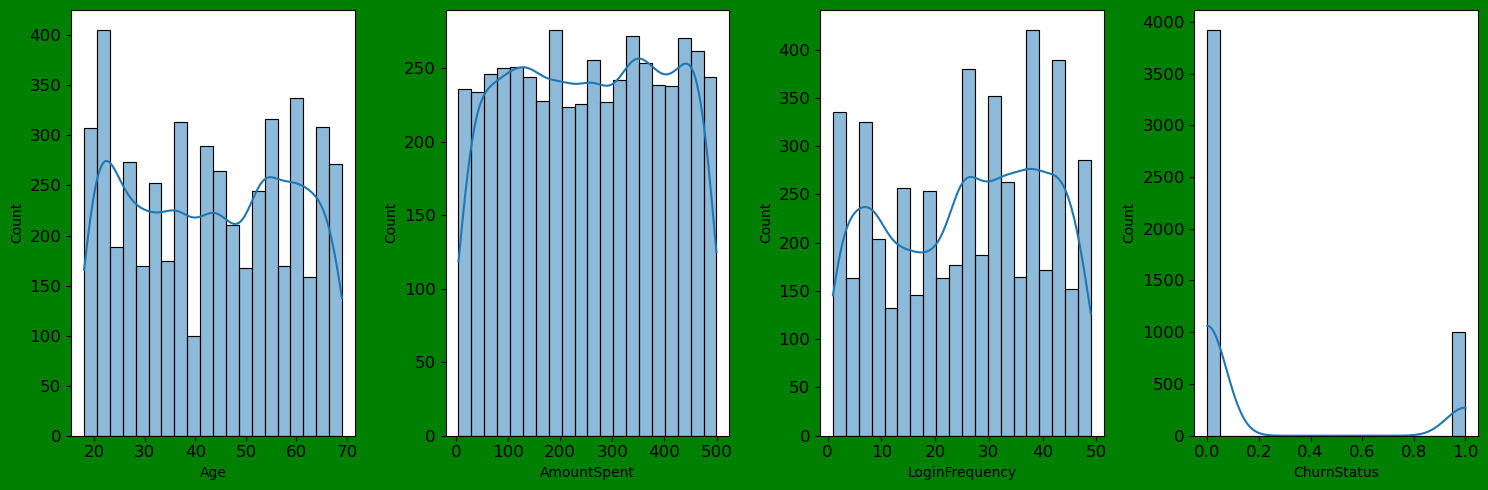

In [29]:
# FOR NUMERICAL COLUMNS
plt.figure(figsize=(15,5),facecolor='green')
plotnumber=1
for i in merged_df.select_dtypes(exclude='object'):
    plt.subplot(1,4,plotnumber)
    sns.histplot(x = merged_df[i],bins=20,kde=True)
    plt.xticks(fontsize=12)                       
    plt.yticks(fontsize=12)
    plotnumber=plotnumber+1

plt.tight_layout()

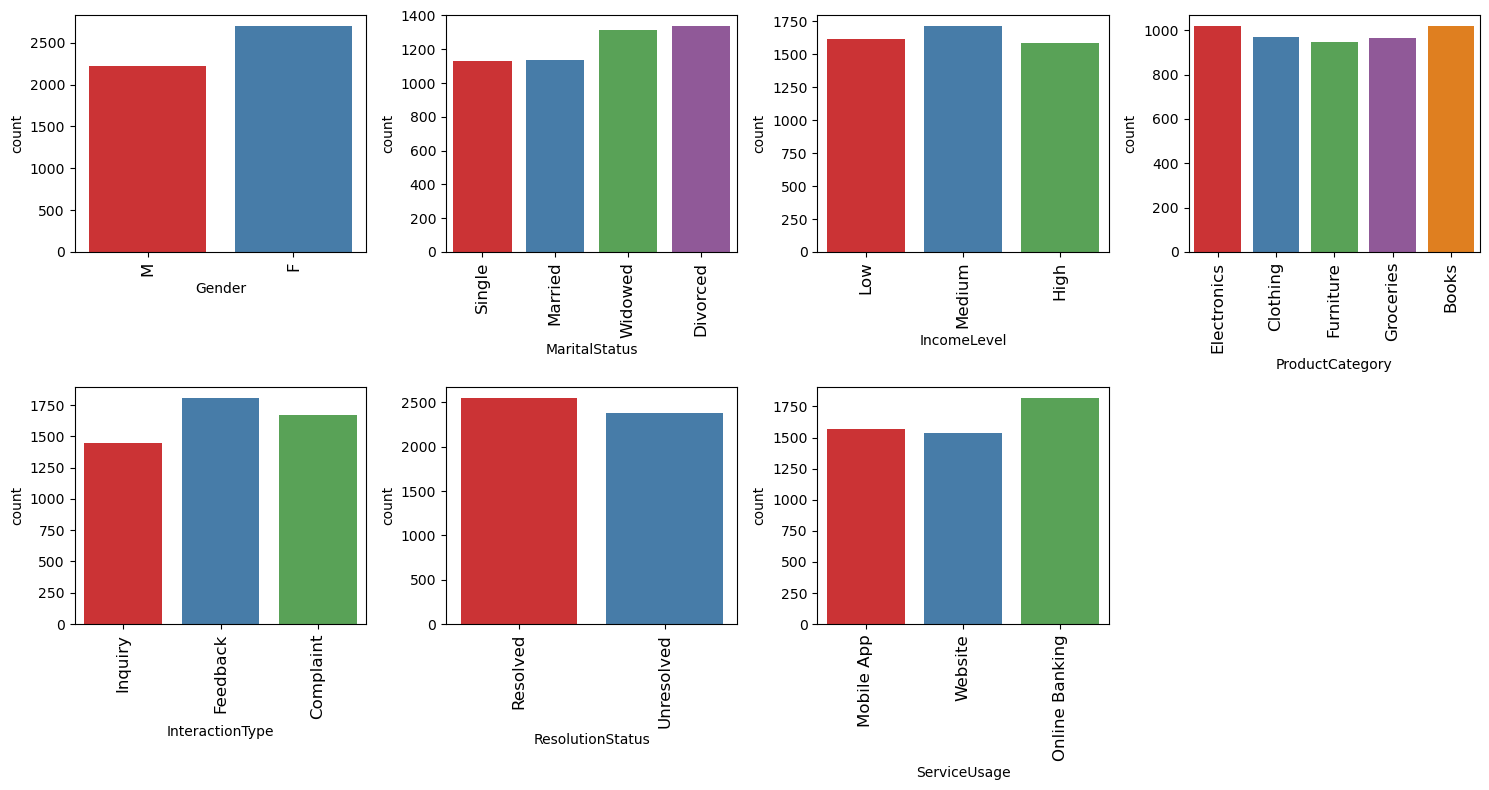

In [30]:
# FOR CATEGORICAL COLUMNS
plt.figure(figsize=(15,8))
plotnumber=1
for i in merged_df.select_dtypes(include='object'):
    plt.subplot(2,4,plotnumber)
    sns.countplot(x = merged_df[i],palette="Set1")
    plt.xticks(rotation = 90,fontsize=12)                    
    plotnumber=plotnumber+1

plt.tight_layout()

### 5.3. BIVARIATE ANALYSIS

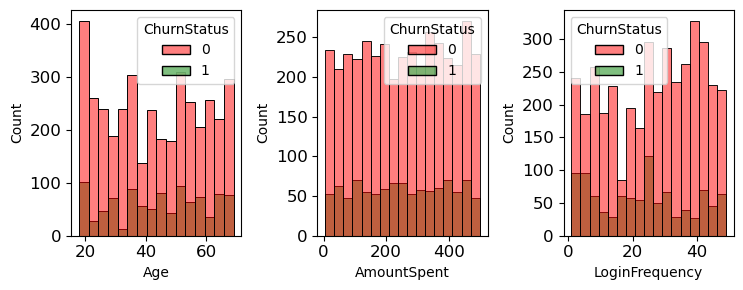

In [32]:
# FOR NUMERICAL COLUMNS
plt.figure(figsize=(10,3))         
plotnumber = 1                      
for i in merged_df.select_dtypes(exclude='object').drop('ChurnStatus',axis=1):         
    plt.subplot(1,4,plotnumber)     
    sns.histplot(x = merged_df[i],hue = merged_df.ChurnStatus,palette=["red","green"])
    plt.xticks(fontsize=12)         
    plt.yticks(fontsize=12)         
    plotnumber = plotnumber + 1     
plt.tight_layout()     

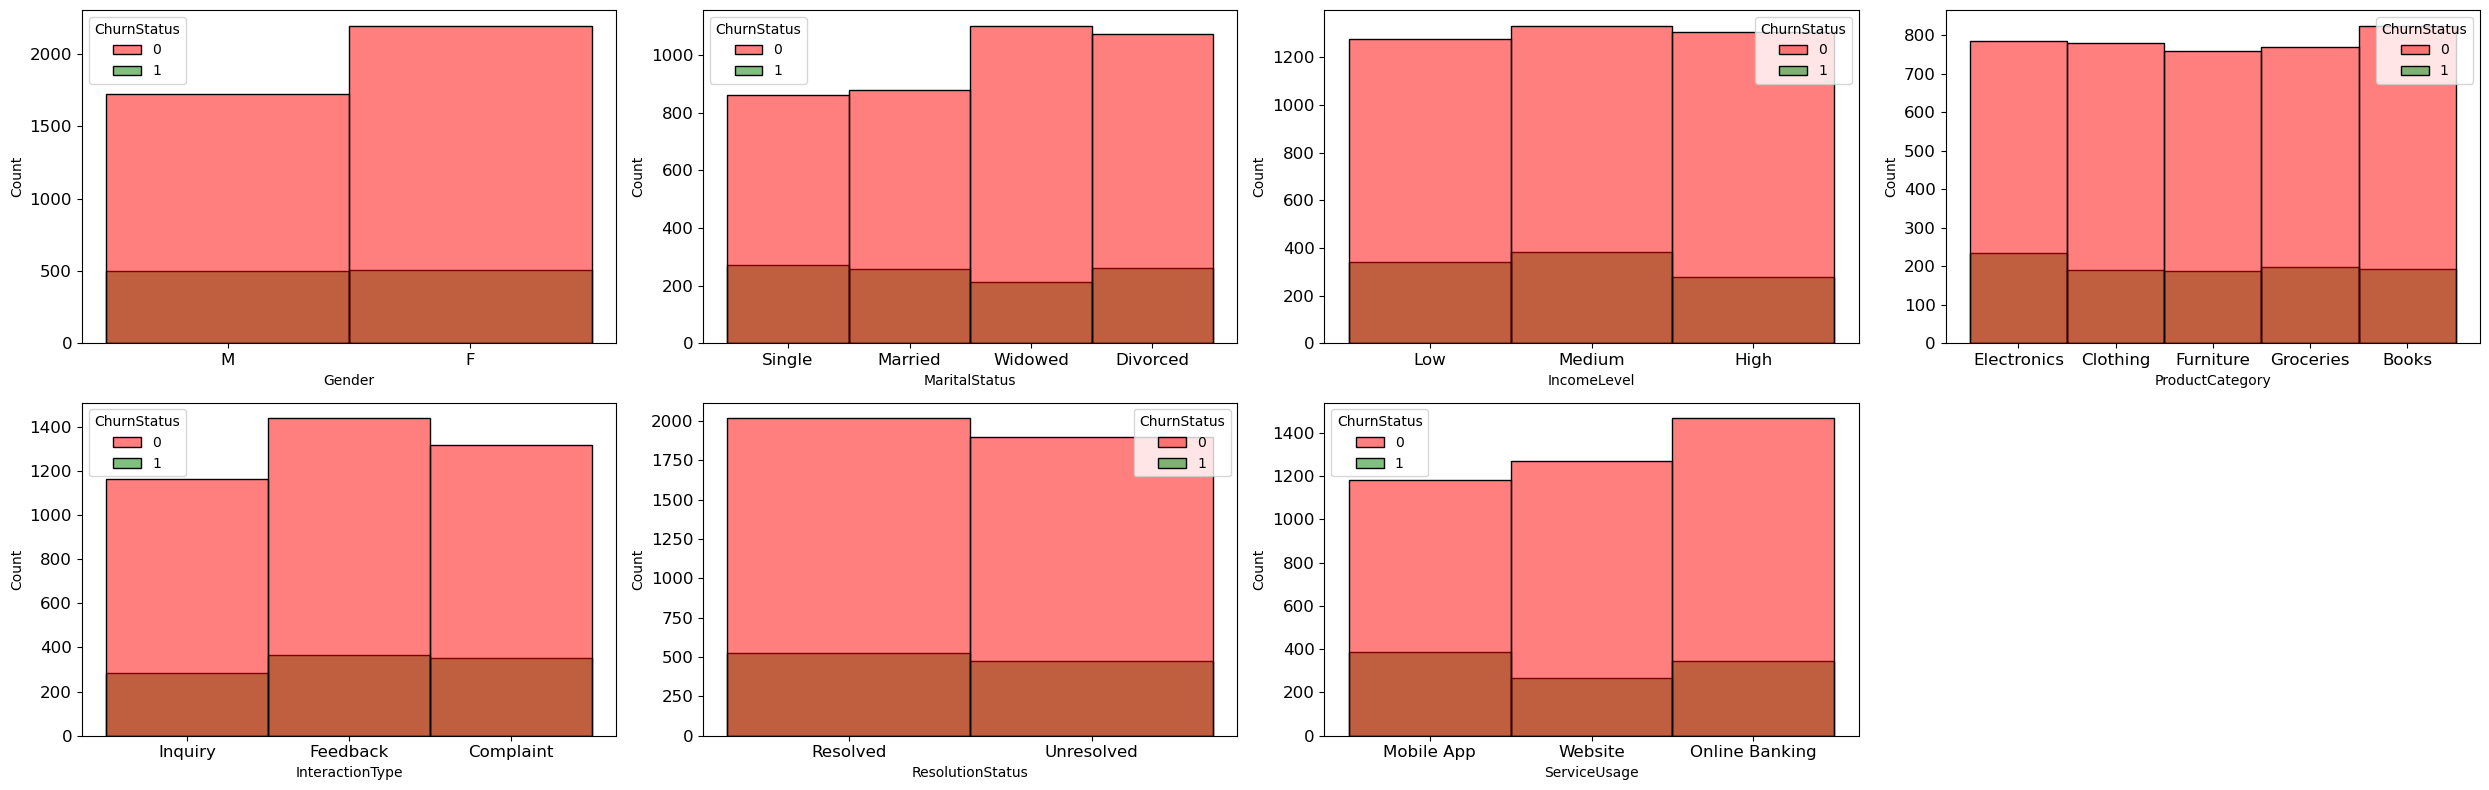

In [33]:
# FOR CATEGORICAL COLUMNS
plt.figure(figsize=(25,8))         
plotnumber = 1                      
for i in merged_df.select_dtypes(include='object'):         
    plt.subplot(2,4,plotnumber)     
    sns.histplot(x = merged_df[i],hue = merged_df.ChurnStatus,palette=["red","green"])
    plt.xticks(fontsize=12)         
    plt.yticks(fontsize=12)         
    plotnumber = plotnumber + 1     
plt.tight_layout()  

## 6. DATA PREPROCESSING

### 6.1. CHECKING NULL VALUES

In [36]:
print(merged_df.isnull().sum())

Age                 0
Gender              0
MaritalStatus       0
IncomeLevel         0
AmountSpent         0
ProductCategory     0
InteractionType     0
ResolutionStatus    0
LoginFrequency      0
ServiceUsage        0
ChurnStatus         0
dtype: int64


### 6.2. IDENTIFYING OUTLIERS

Since ChurnStatus is categorical but stored as int, Boxplots are not suitable for ChurnStatus.
So, we remove ChurnStatus column.

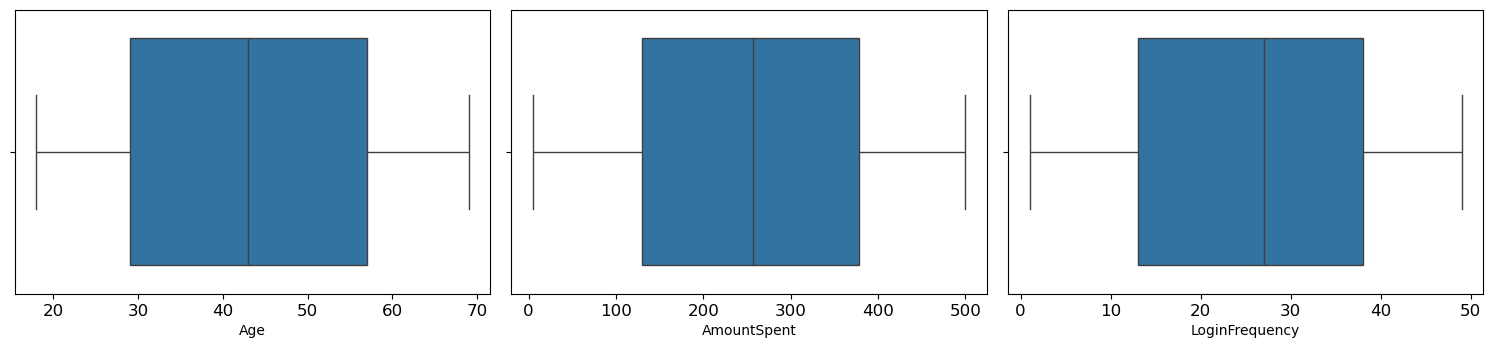

In [39]:
# boxplot to identify outliers
plt.figure(figsize=(20,10))                      
plotnumber = 1
for i in merged_df.select_dtypes(exclude='object').drop('ChurnStatus',axis=1):                       
    plt.subplot(3,4,plotnumber)                   
    sns.boxplot(x = merged_df[i])                      
    plt.xticks(fontsize=12)                       
    plt.yticks(fontsize=12)                       
    plotnumber = plotnumber + 1
plt.tight_layout()                                

**NO OUTLIERS DETECTED**

### 6.3. CHECKING SKEWNESS
Skewness range:
- Between -0.5 and 0.5 : data is fairly symmetrical
- Between -1 and -0.5 or 0.5 and 1 : data is moderately skewed
- Greater than 1 or Less than -1 : data is highly skewed

In [42]:
# Calculating skewness
skew_threshold = 1  # Threshold to identify which columns have high skewness(>1)
skewness = merged_df.select_dtypes(exclude='object').drop('ChurnStatus',axis=1).skew()
high_skew_cols = skewness[abs(skewness) > skew_threshold].index.tolist()
print(skewness)
print("Columns have high skewness:", high_skew_cols)

Age              -0.005492
AmountSpent      -0.017353
LoginFrequency   -0.149661
dtype: float64
Columns have high skewness: []


**No high skewness in the numerical columns**

### 6.4. ENCODING CATEGORICAL COLUMN

In [45]:
for i in merged_df.select_dtypes(include='object'):
    merged_df[i]=LabelEncoder().fit_transform(merged_df[i])
merged_df.head()

,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage,ChurnStatus
0,62,1,2,1,416.50,2,2,0,34,0,0
1,65,1,1,1,54.96,1,2,0,5,2,1
2,65,1,1,1,197.50,2,2,0,5,2,1
3,65,1,1,1,101.31,3,2,0,5,2,1
4,65,1,1,1,397.37,1,2,0,5,2,1


Label Encoding is used to convert categorical columns into numerical form by assigning each category a unique integer. This allows machine learning models that require numerical inputs to process categorical data effectively.

In [47]:
# Verification
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 0 to 5203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               4920 non-null   int64  
 1   Gender            4920 non-null   int32  
 2   MaritalStatus     4920 non-null   int32  
 3   IncomeLevel       4920 non-null   int32  
 4   AmountSpent       4920 non-null   float64
 5   ProductCategory   4920 non-null   int32  
 6   InteractionType   4920 non-null   int32  
 7   ResolutionStatus  4920 non-null   int32  
 8   LoginFrequency    4920 non-null   int64  
 9   ServiceUsage      4920 non-null   int32  
 10  ChurnStatus       4920 non-null   int64  
dtypes: float64(1), int32(7), int64(3)
memory usage: 455.8 KB


### 6.5. FEATURE SELECTION

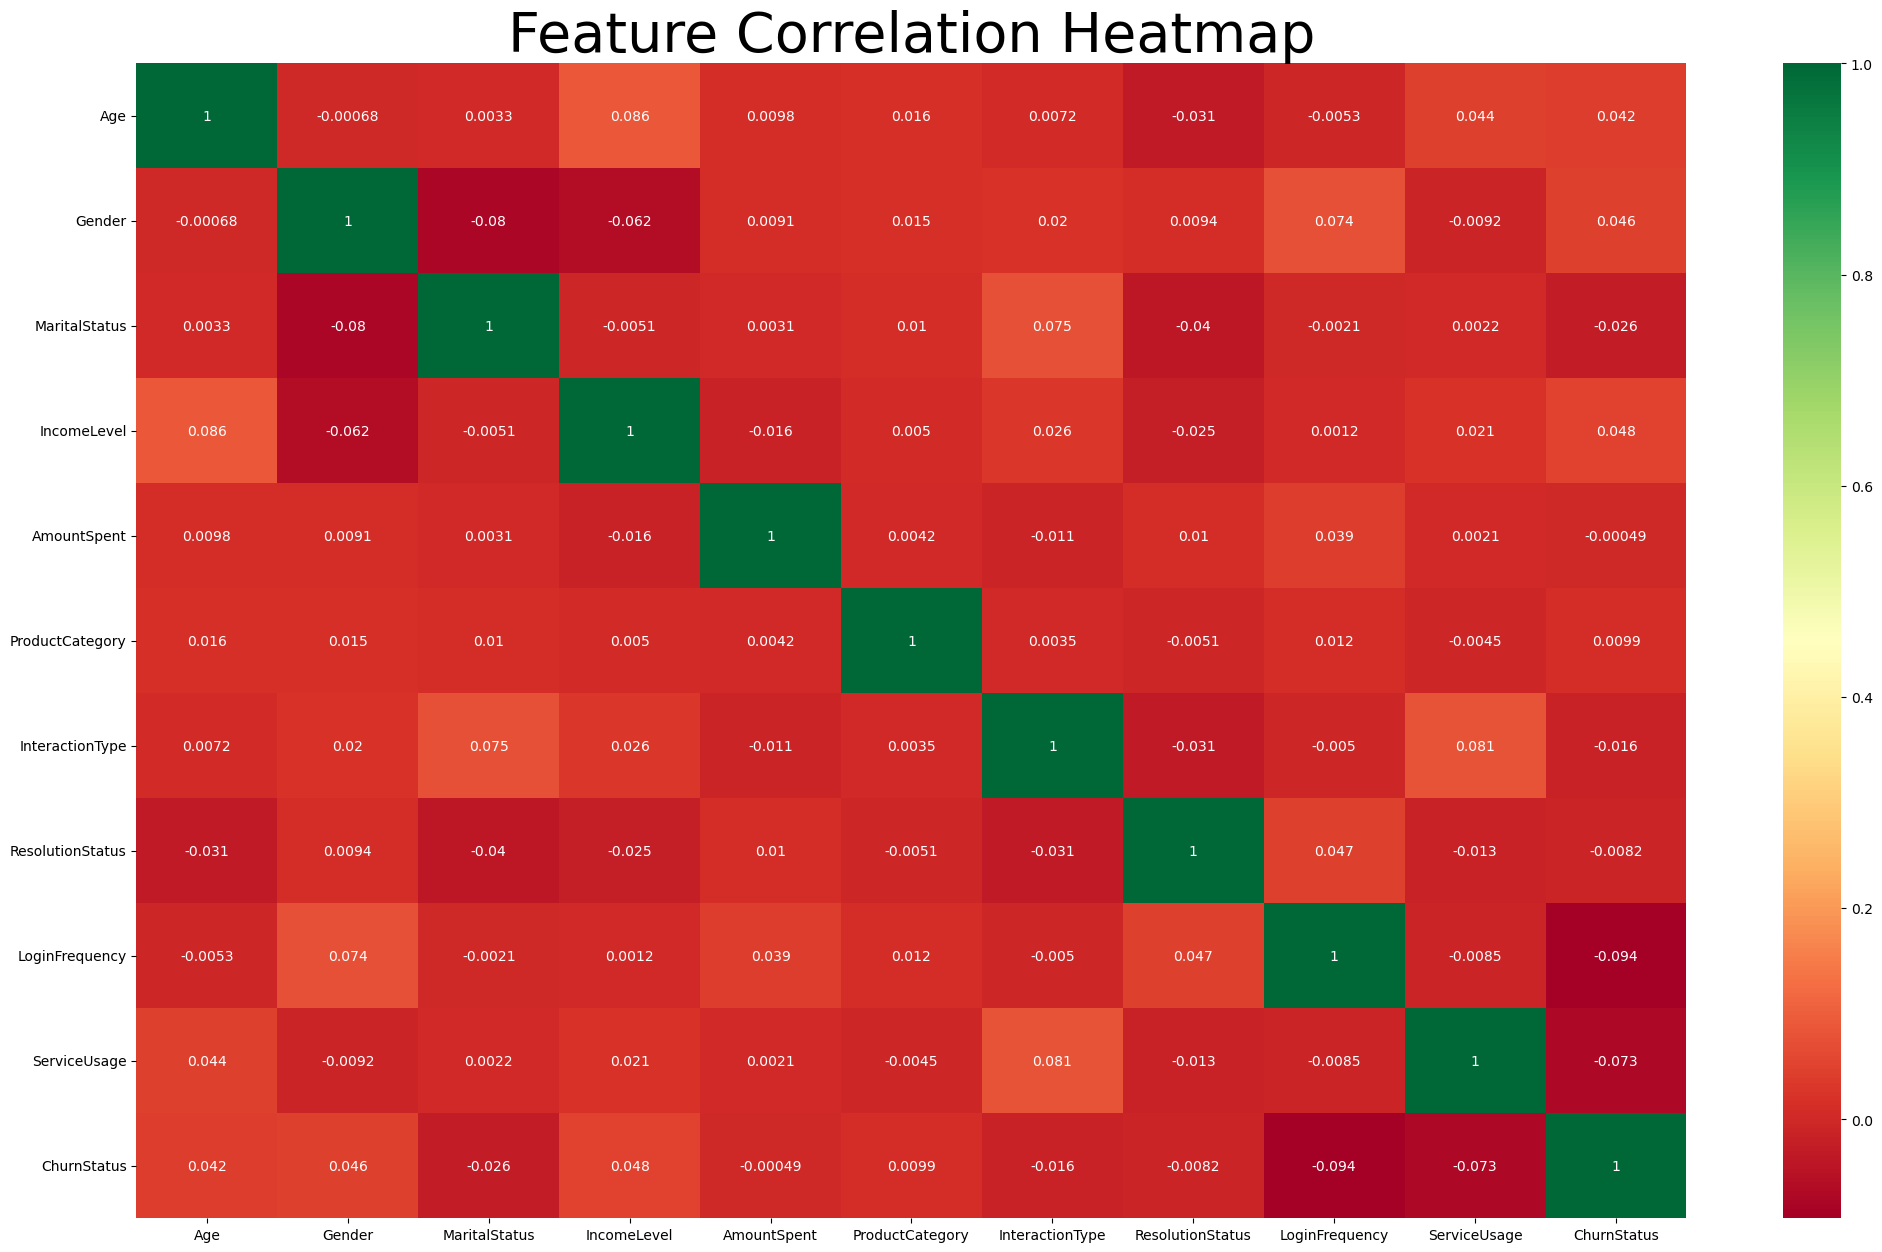

In [49]:
# Correlation Analysis
plt.figure(figsize=(25,15))
sns.heatmap(data=merged_df.corr(),annot=True,cmap='RdYlGn')
plt.title('Feature Correlation Heatmap',fontsize=40)
plt.show()

Since we have only 11 columns. Features like AmountSpent , ProductCategory and ResolutionStatus have no correlation or little correlation with target variable. These features might still be useful (even if their correlation appears low). So, we won't drop them.

### 6.6. FEATURE SCALING
**Using MinMaxScaler**
- MinMaxScaler is a data preprocessing technique that scales features to a specified range, typically between 0 and 1.

In [52]:
df=MinMaxScaler().fit_transform(merged_df.iloc[:,:-1])
df

array([[0.8627451 , 1.        , 0.66666667, ..., 0.        , 0.6875    ,
        0.        ],
       [0.92156863, 1.        , 0.33333333, ..., 0.        , 0.08333333,
        1.        ],
       [0.92156863, 1.        , 0.33333333, ..., 0.        , 0.08333333,
        1.        ],
       ...,
       [0.09803922, 0.        , 0.        , ..., 0.        , 0.6875    ,
        1.        ],
       [0.09803922, 0.        , 0.        , ..., 0.        , 0.6875    ,
        1.        ],
       [0.09803922, 0.        , 0.        , ..., 0.        , 0.6875    ,
        1.        ]])

In [53]:
df1 = pd.DataFrame(df,columns=merged_df.columns[:-1]) 
df1

,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage
0,0.862745,1.0,0.666667,0.5,0.831756,0.50,1.0,0.0,0.687500,0.0
1,0.921569,1.0,0.333333,0.5,0.100663,0.25,1.0,0.0,0.083333,1.0
2,0.921569,1.0,0.333333,0.5,0.388902,0.50,1.0,0.0,0.083333,1.0
3,0.921569,1.0,0.333333,0.5,0.194391,0.75,1.0,0.0,0.083333,1.0
4,0.921569,1.0,0.333333,0.5,0.793072,0.25,1.0,0.0,0.083333,1.0
...,...,...,...,...,...,...,...,...,...,...
4915,0.098039,0.0,0.000000,0.5,0.446170,0.75,1.0,0.0,0.687500,1.0
4916,0.098039,0.0,0.000000,0.5,0.990294,1.00,1.0,0.0,0.687500,1.0
4917,0.098039,0.0,0.000000,0.5,0.194188,0.25,1.0,0.0,0.687500,1.0
4918,0.098039,0.0,0.000000,0.5,0.138983,0.25,1.0,0.0,0.687500,1.0


# Summary Report: Customer Churn Data Preparation
## 1. Datasets Selected and Rationale
Selected all sheets from the provided Excel file Customer_Churn_Data_Large.xlsx to ensure a comprehensive view of customer behavior. These included:

- **Customer_Demographics**: Contains customer profile information such as age, gender, marital status, and income level. These demographic features help segment customers and understand churn patterns across groups.

- **Transaction_History**: Records of customer transactions with details like transaction dates, amount spent, and product categories. Transaction data reflects customer engagement and monetary value.

- **Customer_Service**: Logs of customer service interactions including interaction types, resolution status, and dates. These highlight customer satisfaction and potential pain points.

- **Online_Activity**: Includes last login date, login frequency, and service usage which are direct indicators of customer engagement.

- **Churn_Status**: Helps to predict whether the customer has churned (left the service) or not.
  
Rationale:
Combining these datasets provides a holistic view of each customer’s profile, financial behavior, service experience, and engagement - all critical factors influencing churn.

----------

## 2. Visualizations and Statistical Summaries from EDA
- Churn does not seem to be heavily influenced by age, as churned customers are evenly spread across all ages. 
- Customers who spend less are more likely to churn.
- Customers with lower login frequency are more likely to churn.
- Slightly higher count of females (F) compared to males (M) and Churn is similar across both genders.
- Highest counts for "Widowed" and "Divorced" statuses and Churn is similar across all categories, maybe slightly higher for "Divorced".
- Churn seems to be more common in "Low" and "Medium" income levels.
- Highest counts for "Books", "Electronics" and "Clothing" products and Churn is similar across all product categories, maybe slightly higher for "Electronics".
- Complaints are strong churn predictors.
- Unresolved issues are more likely to churn.
- Higher counts for "Online Banking" and Churn risk is lower.

-------------
## 3. Cleaned and Preprocessed Data 
- Check null values
- Removing duplicates
- Check corrupted values
- Identifying any outliers
- Check skewness
- Encoding categorical features(LabelEncoder)
- Feature selection
- Feature scaling (MinMaxScaler)

---------
## 4. Next Steps
- **Model Development**: Train classification models (e.g., logistic regression, random forest, etc.,) using the cleaned dataset.
- **Evaluation and Tuning**: Evaluate models using metrics like accuracy, precision, recall, etc., and tune hyperparameters.